In [80]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Question - 1

256


Text(0.5, 1.0, 'Transformed Image')

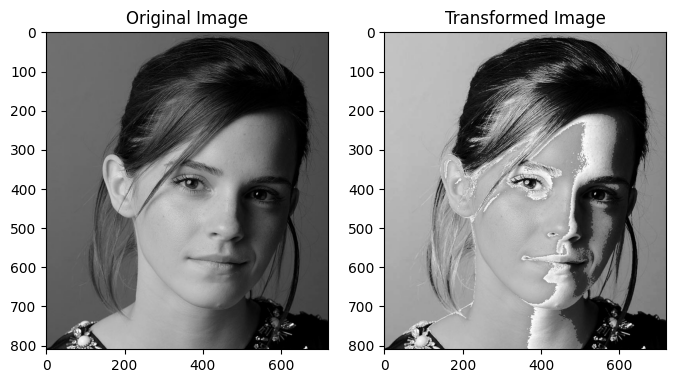

In [82]:
im1 = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.linspace(0, 50, 51).astype('uint8')
t2 = np.linspace(101, 255, 100).astype('uint8')
t3 = np.linspace(151, 255, 105).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

im_transformed = cv.LUT(im1, transform)

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image')

### Question - 2

#### 2.1 White matter

256


(0.0, 255.0)

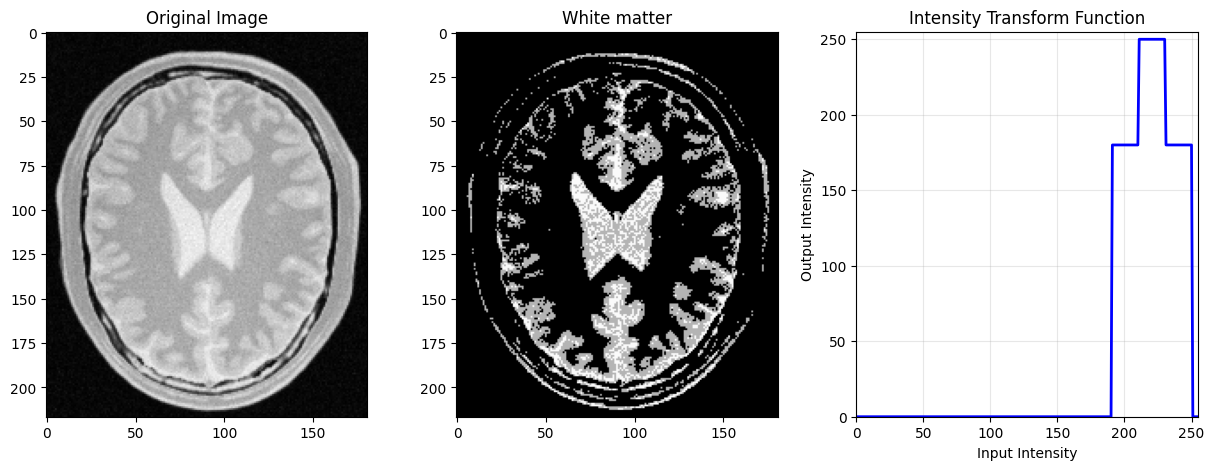

In [83]:
im2 = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

cp1 = 190
cp2 = 210
cp3 = 230
cp4 = 250
w1 = np.linspace(0, 0, cp1+1).astype('uint8')
w2 = np.linspace(180, 180, cp2-cp1).astype('uint8')
w3 = np.linspace(250, 250, cp3-cp2).astype('uint8')
w4 = np.linspace(180, 180, cp4-cp3).astype('uint8')
w5 = np.linspace(0, 0, 255-cp4).astype('uint8')

transform = np.concatenate((w1, w2), axis=0).astype('uint8')
transform = np.concatenate((transform, w3), axis=0).astype('uint8')
transform = np.concatenate((transform, w4), axis=0).astype('uint8')
transform = np.concatenate((transform, w5), axis=0).astype('uint8')
print(len(transform))

im_transformed = cv.LUT(im2, transform)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('White matter')
input_values = np.arange(len(transform))
ax[2].plot(input_values, transform, 'b-', linewidth=2, label='Transform Function')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_title('Intensity Transform Function')
ax[2].grid(True, alpha=0.3)
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)

#### 2.2 Gray matter

256


(0.0, 255.0)

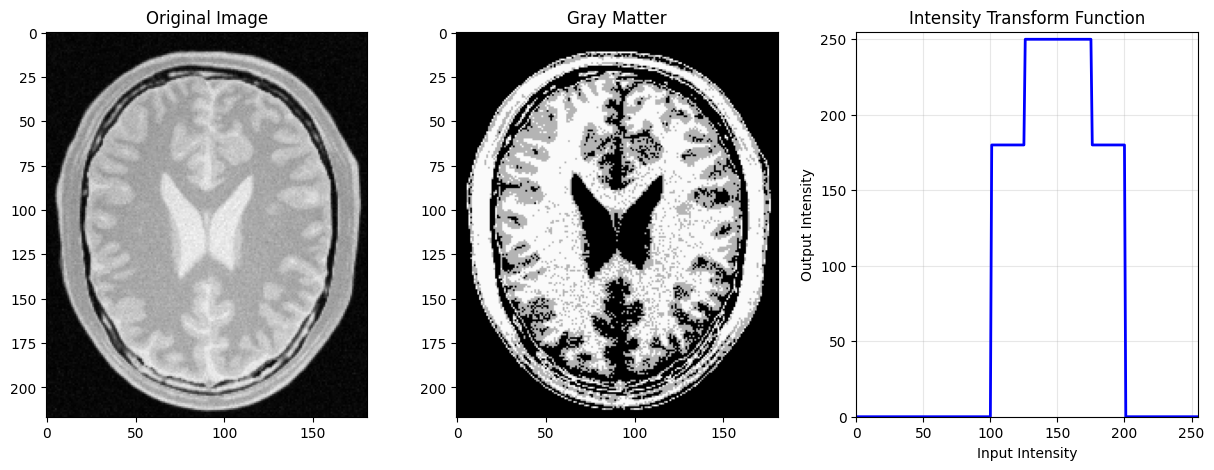

In [84]:
im2 = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

cp5 = 100
cp6 = 125
cp7 = 175
cp8 = 200
g1 = np.linspace(0, 0, cp5+1).astype('uint8')
g2 = np.linspace(180, 180, cp6-cp5).astype('uint8')
g3 = np.linspace(250, 250, cp7-cp6).astype('uint8')
g4 = np.linspace(180, 180, cp8-cp7).astype('uint8')
g5 = np.linspace(0, 0, 255-cp8).astype('uint8')

transform = np.concatenate((g1, g2), axis=0).astype('uint8')
transform = np.concatenate((transform, g3), axis=0).astype('uint8')
transform = np.concatenate((transform, g4), axis=0).astype('uint8')
transform = np.concatenate((transform, g5), axis=0).astype('uint8')
print(len(transform))

im_transformed = cv.LUT(im2, transform)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('Gray Matter')
input_values = np.arange(len(transform))
ax[2].plot(input_values, transform, 'b-', linewidth=2, label='Transform Function')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_title('Intensity Transform Function')
ax[2].grid(True, alpha=0.3)
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)

### Question - 3

Text(0.5, 1.0, 'Transformed Image (gamma = 0.5)')

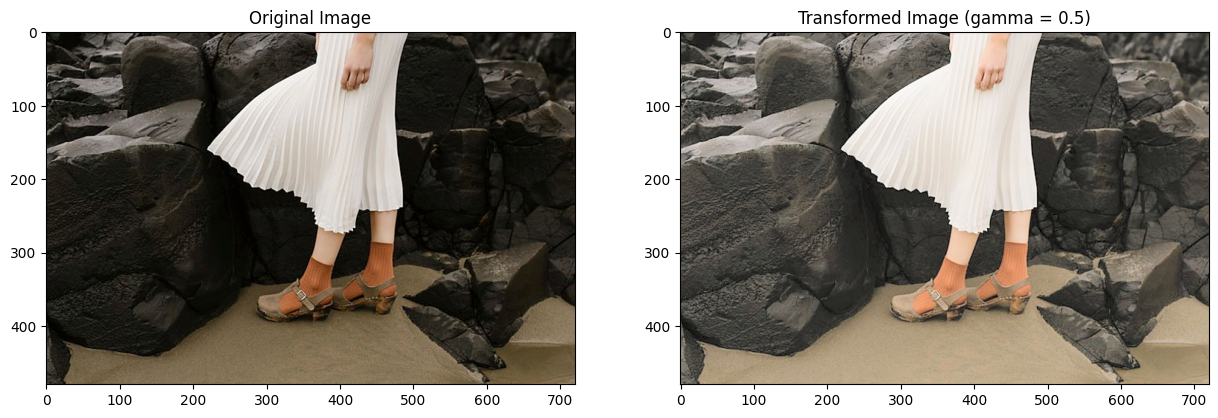

In [85]:
im3 = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
im3_lab = cv.cvtColor(im3, cv.COLOR_BGR2LAB)

L, a, b = cv.split(im3_lab)

gamma = 0.5
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')
L_corrected = cv.LUT(L, t)

im3_corrected_lab = cv.merge([L_corrected, a, b])

im3_rgb = cv.cvtColor(im3_lab, cv.COLOR_LAB2RGB)
im3_corrected_rgb = cv.cvtColor(im3_corrected_lab, cv.COLOR_LAB2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(im3_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(im3_corrected_rgb)
ax[1].set_title(f'Transformed Image (gamma = {gamma})')

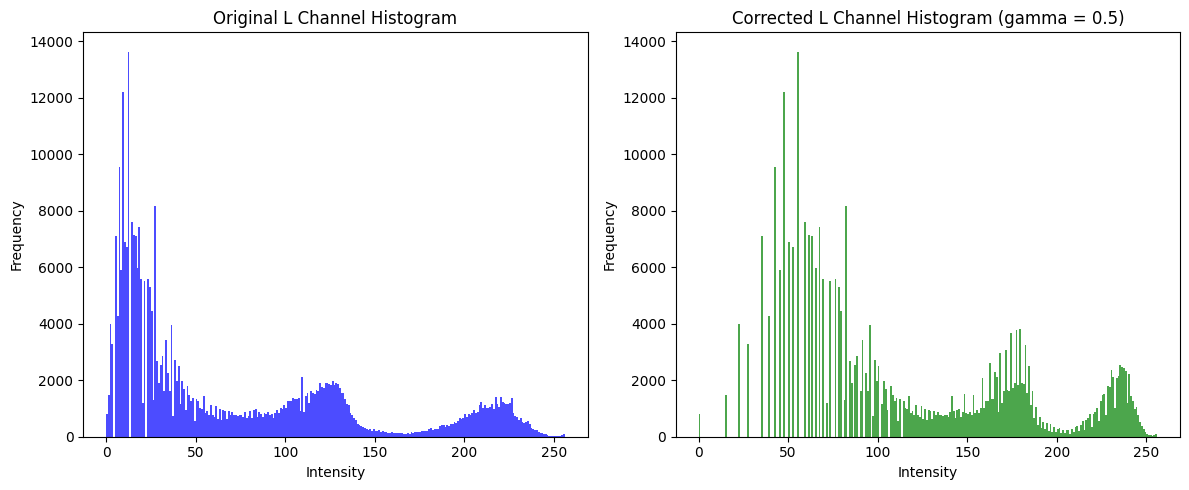

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].hist(L.ravel(), bins=256, range=[0,256], color='blue', alpha=0.7)
ax[0].set_title('Original L Channel Histogram')
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Frequency')

ax[1].hist(L_corrected.ravel(), bins=256, range=[0,256], color='green', alpha=0.7)
ax[1].set_title(f'Corrected L Channel Histogram (gamma = {gamma})')
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Question - 4

Text(0.5, 1.0, 'Transformed Image (a = 0.7), (sigma = 70)')

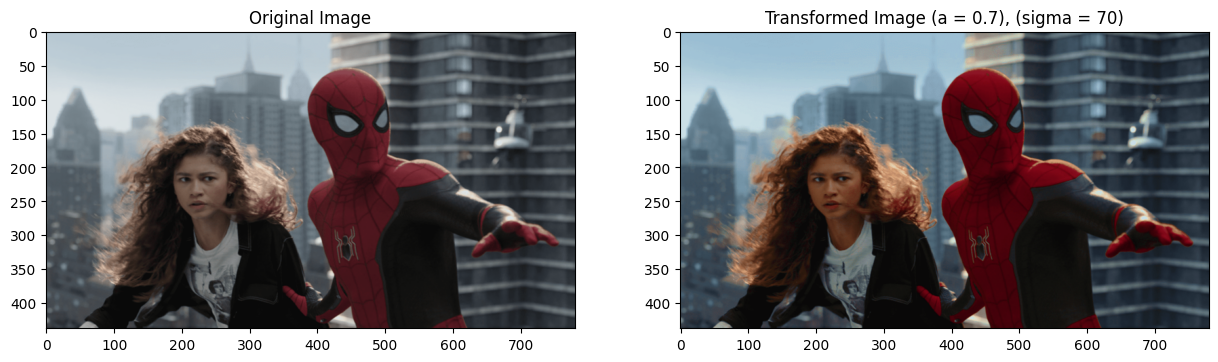

In [87]:
im4 = cv.imread('a1images/spider.png', cv.IMREAD_COLOR)
im4_hsv = cv.cvtColor(im4, cv.COLOR_BGR2HSV)

h, s, v = cv.split(im4_hsv)

a = 0.7
sigma = 70

x = np.arange(0, 256)
gaussian = 128*np.exp(-((x-128)**2)/(2*(sigma**2)))
transform = np.minimum(x + a*gaussian, 255).astype('uint8')

s_corrected = cv.LUT(s, transform)

im4_corrected_hsv = cv.merge([h, s_corrected, v])

im4_rgb = cv.cvtColor(im4_hsv, cv.COLOR_HSV2RGB)
im4_corrected_rgb = cv.cvtColor(im4_corrected_hsv, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(im4_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(im4_corrected_rgb)
ax[1].set_title(f'Transformed Image (a = {a}), (sigma = {sigma})')

Text(0.5, 1.0, 'Value')

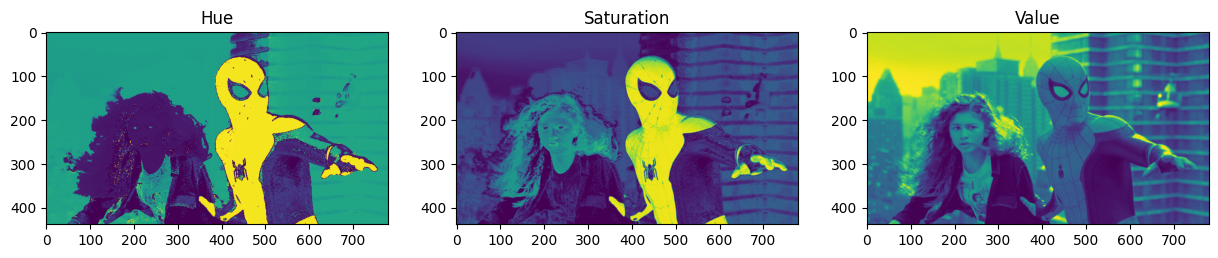

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(15,8))
ax[0].imshow(h)
ax[0].set_title('Hue')
ax[1].imshow(s)
ax[1].set_title('Saturation')
ax[2].imshow(v)
ax[2].set_title('Value')

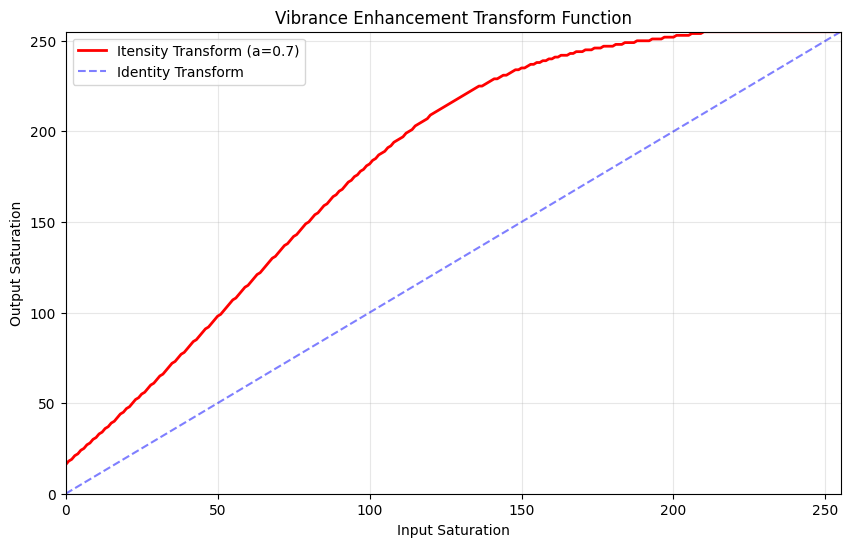

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(x, transform, 'r-', linewidth=2, label=f'Itensity Transform (a={a})')
plt.plot([0, 255], [0, 255], 'b--', alpha=0.5, label='Identity Transform')
plt.xlabel('Input Saturation')
plt.ylabel('Output Saturation')
plt.title('Vibrance Enhancement Transform Function')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()

### Question - 5

Text(0.5, 1.0, 'Histogram Equalized Image')

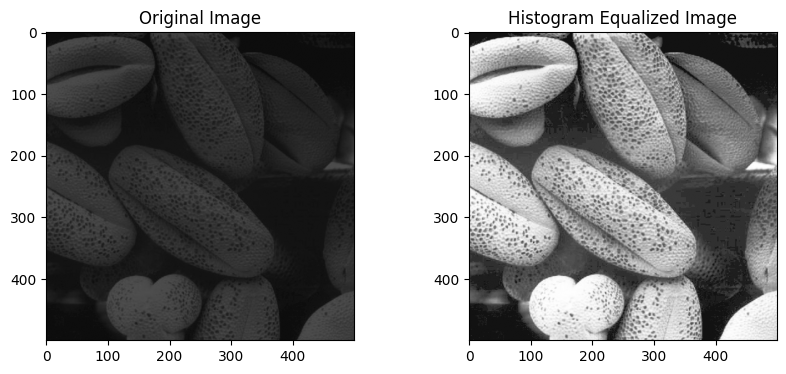

In [90]:
def histogram_equalization(image):
    L = 256
    M, N = image.shape

    histogram = cv.calcHist([image], [0], None, [L], [0, L])
    cdf = histogram.cumsum()

    transform = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)], dtype=np.uint8)
    return transform[image]

im5 = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
im5_equalized = histogram_equalization(im5)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(im5, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')

ax[1].imshow(im5_equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalized Image')





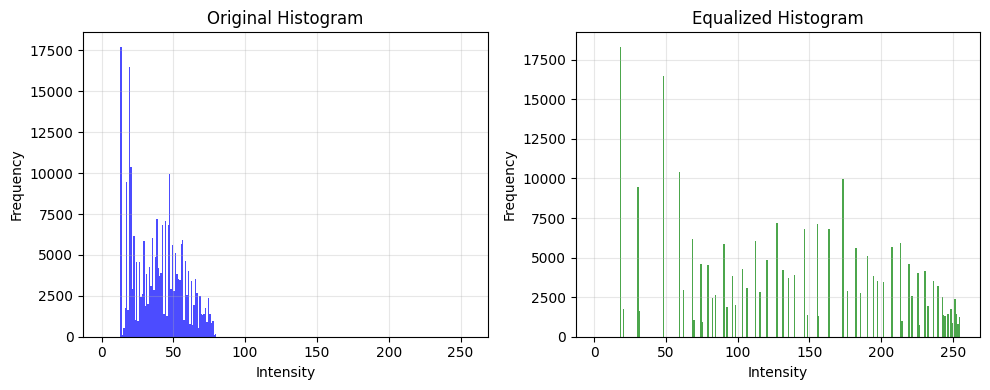

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(im5.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
ax[0].set_title('Original Histogram')
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Frequency')
ax[0].grid(True, alpha=0.3)
ax[1].hist(im5_equalized.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
ax[1].set_title('Equalized Histogram')
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Frequency')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Question - 6

Text(0.5, 1.0, 'Value')

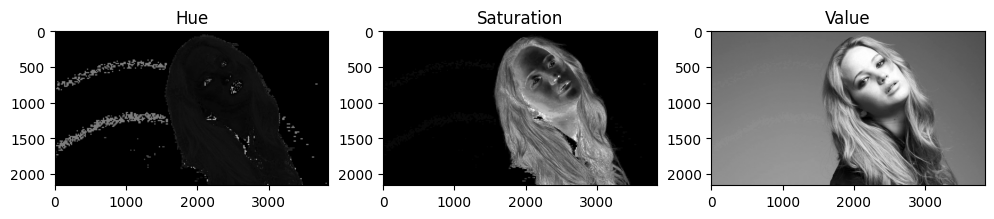

In [92]:
im6 = cv.imread('a1images/jeniffer.jpg', cv.IMREAD_COLOR)
im6_hsv = cv.cvtColor(im6, cv.COLOR_BGR2HSV)
im6_rgb = cv.cvtColor(im6, cv.COLOR_BGR2RGB)

h, s, v = cv.split(im6_hsv)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(h, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')

ax[1].imshow(s, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')

ax[2].imshow(v, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')


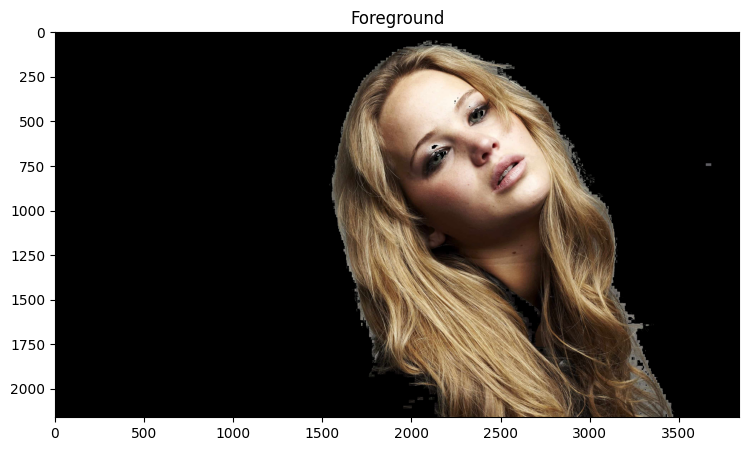

In [93]:
threshold = 11
_, mask = cv.threshold(s, threshold, 255, cv.THRESH_BINARY)

foreground = cv.bitwise_and(im6, im6, mask=mask)

plt.figure(figsize=(10, 5))

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.show()

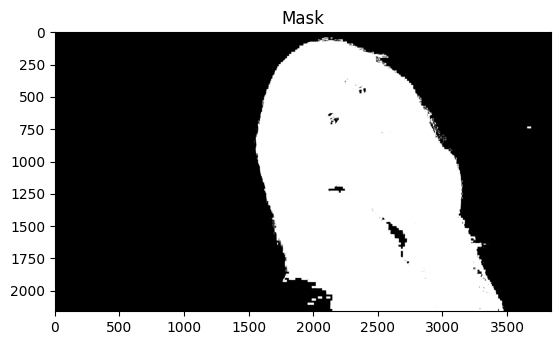

In [94]:
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

In [95]:
foreground_v = cv.bitwise_and(v, v, mask=mask)
foreground_pixels = v[mask==255]

In [96]:
hist_fg = cv.calcHist([foreground_pixels], [0], None, [256], [0, 256])

print(f"Number of foreground pixels: {len(foreground_pixels)}")
print(f"Total pixels in image: {v.shape[0] * v.shape[1]}")
print(f"Foreground percentage: {(len(foreground_pixels)/(v.shape[0] * v.shape[1]))*100:.1f}%")

Number of foreground pixels: 2728920
Total pixels in image: 8294400
Foreground percentage: 32.9%


In [97]:
cdf_fg = hist_fg.cumsum()

transform = np.array([255/(len(foreground_pixels))*cdf_fg[k] for k in range(256)], dtype=np.uint8)

In [98]:
v_equalized = v.copy()
v_equalized[mask==255] = transform[v[mask==255]]

In [99]:
im6_result_hsv = cv.merge([h, s, v_equalized])
im6_result_rgb = cv.cvtColor(im6_result_hsv, cv.COLOR_HSV2RGB)

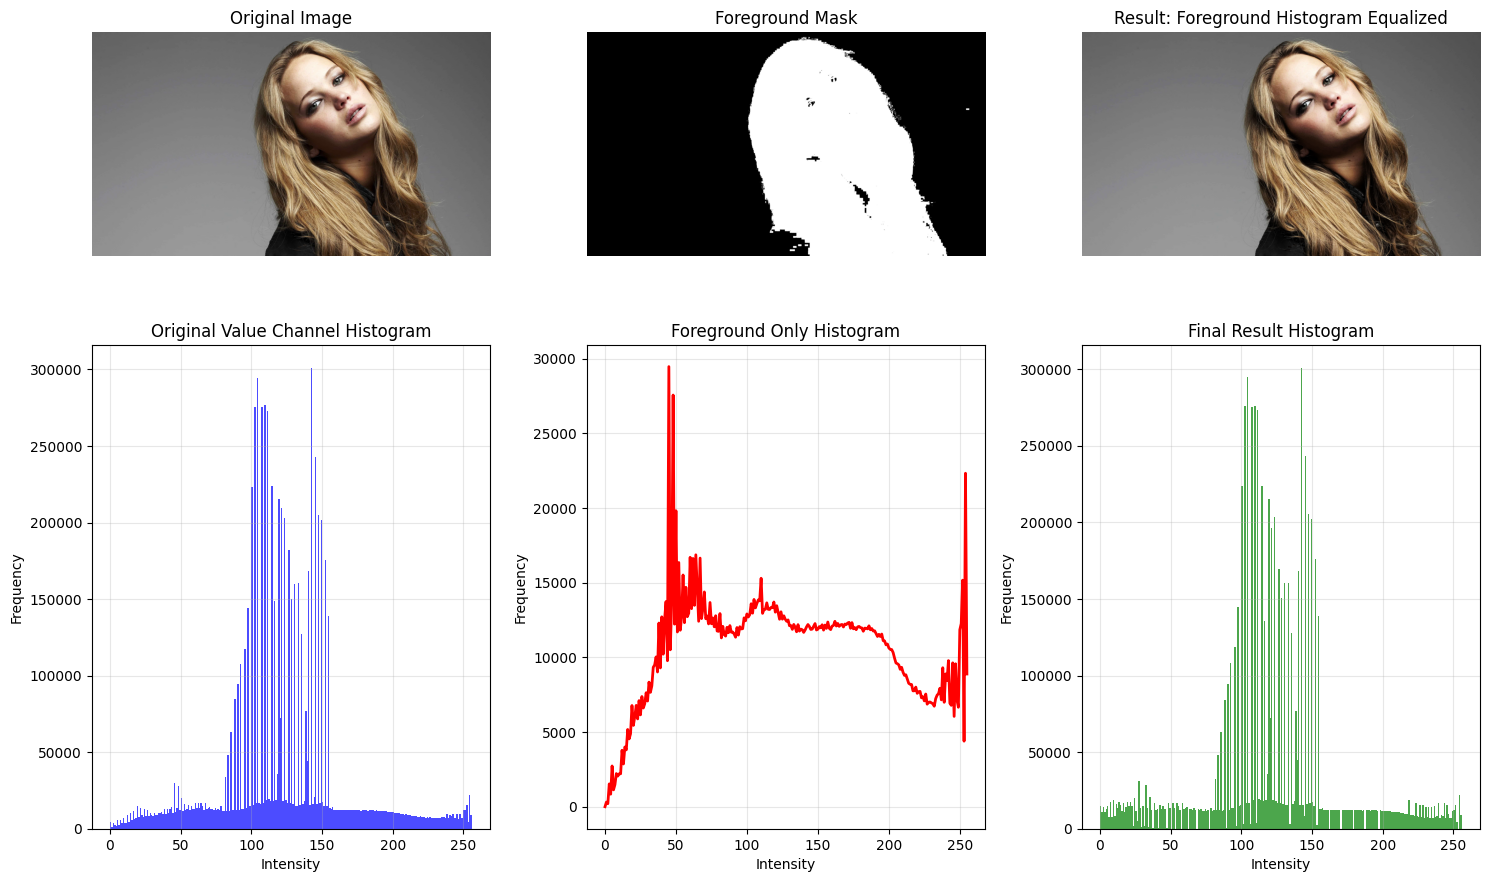

In [100]:
# Display comprehensive results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Top row: Images
axes[0, 0].imshow(im6_rgb)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(mask, cmap='gray')
axes[0, 1].set_title('Foreground Mask')
axes[0, 1].axis('off')

axes[0, 2].imshow(im6_result_rgb)
axes[0, 2].set_title('Result: Foreground Histogram Equalized')
axes[0, 2].axis('off')

# Bottom row: Histograms and analysis
axes[1, 0].hist(v.ravel(), bins=256, range=[0, 256], alpha=0.7, color='blue', label='Original')
axes[1, 0].set_title('Original Value Channel Histogram')
axes[1, 0].set_xlabel('Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(hist_fg.ravel(), color='red', linewidth=2)
axes[1, 1].set_title('Foreground Only Histogram')
axes[1, 1].set_xlabel('Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].hist(v_equalized.ravel(), bins=256, range=[0, 256], alpha=0.7, color='green')
axes[1, 2].set_title('Final Result Histogram')
axes[1, 2].set_xlabel('Intensity')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

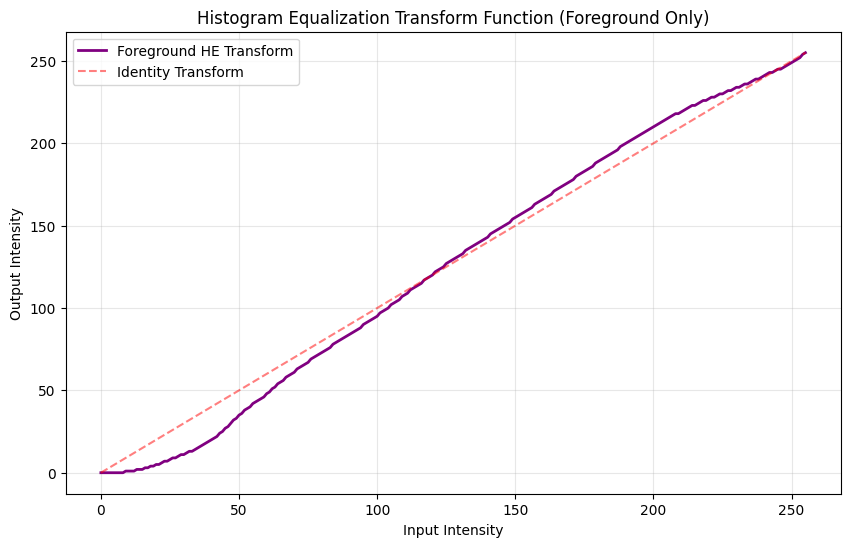

In [101]:
# Show the transformation function
plt.figure(figsize=(10, 6))
plt.plot(range(256), transform, 'purple', linewidth=2, label='Foreground HE Transform')
plt.plot([0, 255], [0, 255], 'r--', alpha=0.5, label='Identity Transform')
plt.title('Histogram Equalization Transform Function (Foreground Only)')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

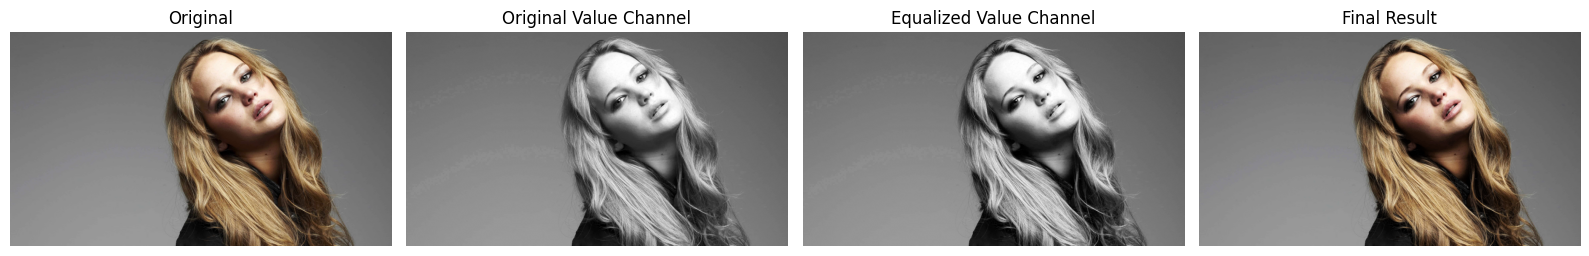

In [102]:
# Compare before and after side by side
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(im6_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(v, cmap='gray')
axes[1].set_title('Original Value Channel')
axes[1].axis('off')

axes[2].imshow(v_equalized, cmap='gray')
axes[2].set_title('Equalized Value Channel')
axes[2].axis('off')

axes[3].imshow(im6_result_rgb)
axes[3].set_title('Final Result')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### Question - 7

Text(0.5, 1.0, 'Sobel Horizontol (filter2D)')

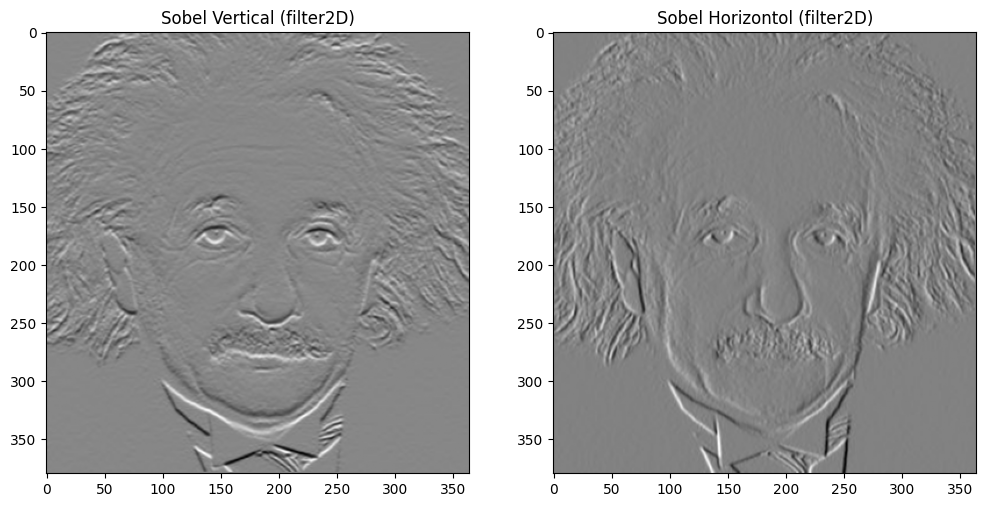

In [103]:
im7 = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
sobel_y = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

im_x = cv.filter2D(im7, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im7, cv.CV_64F, sobel_y)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel Vertical (filter2D)')

ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Horizontol (filter2D)')


In [104]:
def sobel_filter(image, sobel_kernel):
    rows, columns = image.shape
    output_image = np.zeros(shape=(rows, columns))

    for i in range (rows-2):
        for j in range(columns-2):
            val = np.sum(np.multiply(sobel_kernel, image[i:i+3, j:j+3]))
            output_image[i+1,j+1] = val

    return output_image


Text(0.5, 1.0, 'Sobel Horizontol (Custom Function)')

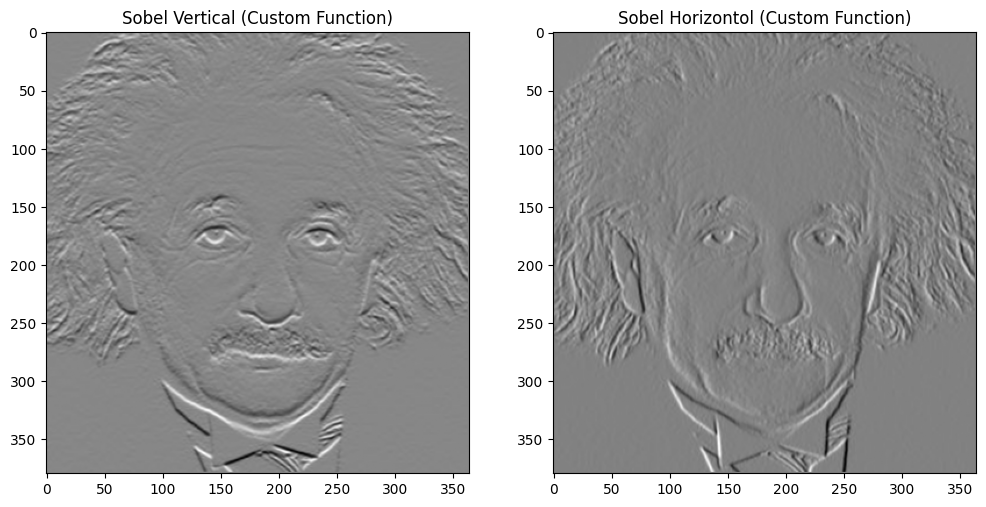

In [105]:
sobel_vertical = sobel_filter(im7, sobel_x)
sobel_horizontol = sobel_filter(im7, sobel_y)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(sobel_vertical, cmap='gray')
ax[0].set_title('Sobel Vertical (Custom Function)')

ax[1].imshow(sobel_horizontol, cmap='gray')
ax[1].set_title('Sobel Horizontol (Custom Function)')

Text(0.5, 1.0, 'Sobel Horizontol (Custom Function)')

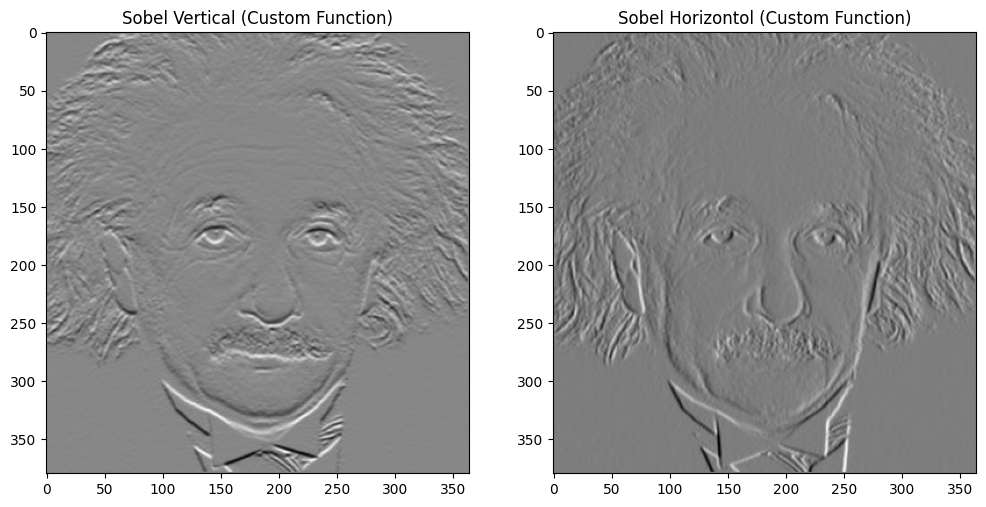

In [106]:
x = np.array([[1], [2], [1]])
y = np.array([[1,0,-1]])

sobel_y = np.multiply(x, y)
sobel_x = np.multiply(np.transpose(y), -1*np.transpose(x))

sobel_horizontol = sobel_filter(im7, sobel_y)
sobel_vertical = sobel_filter(im7, sobel_x)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(sobel_vertical, cmap='gray')
ax[0].set_title('Sobel Vertical (Custom Function)')

ax[1].imshow(sobel_horizontol, cmap='gray')
ax[1].set_title('Sobel Horizontol (Custom Function)')


### Question - 8

In [107]:
def zoom_image_nearest(image, scale_factor):
    height, width, channels = image.shape

    new_height = int(height*scale_factor)
    new_width = int(width*scale_factor)

    zoomed = np.zeros((new_height, new_width, channels), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):
            orig_i = int(i/scale_factor)
            orig_j = int(j/scale_factor)

            orig_i = min(orig_i, height - 1) # safety precaution if this exceed original imge size
            orig_j = min(orig_j, width - 1)

            zoomed[i, j, :] = image[orig_i, orig_j, :]

    return zoomed


In [108]:
def bilinear_interpolation(image, scale_factor):
    height, width, channels = image.shape

    new_height = int(height*scale_factor)
    new_width = int(width*scale_factor)

    zoomed = np.zeros((new_height, new_width, channels), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):
            orig_i = i / scale_factor
            orig_j = j / scale_factor
            
            # i1,j1 -> top left, i2,j1 -> top right, i1,j2 -> bottom left, i2,j2 -> bottom right 
            i1 = int(np.floor(orig_i))
            i2 = min(i1+1, height-1)
            j1 = int(np.floor(orig_j))
            j2 = min(j1+1, width-1)

            # weights
            wi = orig_i - i1
            wj = orig_j - j1

            for c in range(channels):
                val = (1-wi)*(1-wj)*image[i1, j1, c] + \
                    (1-wi)*wj*image[i1, j2, c] + \
                    wi*(1-wj)*image[i2, j1, c] + \
                    wi*wj*image[i2, j2, c]
                zoomed[i, j, c] = val

    return zoomed.astype(image.dtype)

In [109]:
def calculate_ssd(img1, img2):
    if (img1.shape != img2.shape):
        raise ValueError('Dimension mismatched')
    
    img1_float = img1.astype(np.float64)
    img2_float = img2.astype(np.float64)

    ssd = np.sum((img1_float-img2_float)**2)
    num_pixels = img1.size
    normalized_ssd = ssd / num_pixels

    return normalized_ssd

In [110]:
def zoom_image(image, large_original, scale_factor=4):
    print(f"Original image shape: {image.shape}")
    print(f"Original image dtype: {image.dtype}")
    print(f"Scale factor: {scale_factor}")

    results = {}
    print("Applying nearest-neighbor interpolation...")
    zoomed_nearest = zoom_image_nearest(image, scale_factor)
    results['nearest'] = zoomed_nearest
    print(f"Nearest-neighbor result shape: {zoomed_nearest.shape}")
    ssd_nearest = calculate_ssd(zoomed_nearest, large_original)
    
    print("Applying bilinear interpolation...")
    zoomed_bilinear = bilinear_interpolation(image, scale_factor)
    results['bilinear'] = zoomed_bilinear
    print(f"Bilinear result shape: {zoomed_bilinear.shape}")
    ssd_bilinear = calculate_ssd(zoomed_bilinear, large_original)
    
    results['original'] = image

    fig, axes = plt.subplots(1, 4, figsize=(15,5))

    axes[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(cv.cvtColor(large_original, cv.COLOR_BGR2RGB))
    axes[1].set_title('Large Original')
    axes[1].axis('off')

    axes[2].imshow(cv.cvtColor(results['nearest'], cv.COLOR_BGR2RGB))
    axes[2].set_title(f'Nearest-Neighbor (x{scale_factor}) - (SSD-{ssd_nearest:.6f})')
    axes[2].axis('off')

    axes[3].imshow(cv.cvtColor(results['bilinear'], cv.COLOR_BGR2RGB))
    axes[3].set_title(f'Bilinear(x{scale_factor}) - (SSD-{ssd_bilinear:.6f})')
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()

    return None

Original image shape: (270, 480, 3)
Original image dtype: uint8
Scale factor: 4
Applying nearest-neighbor interpolation...
Nearest-neighbor result shape: (1080, 1920, 3)
Applying bilinear interpolation...
Bilinear result shape: (1080, 1920, 3)


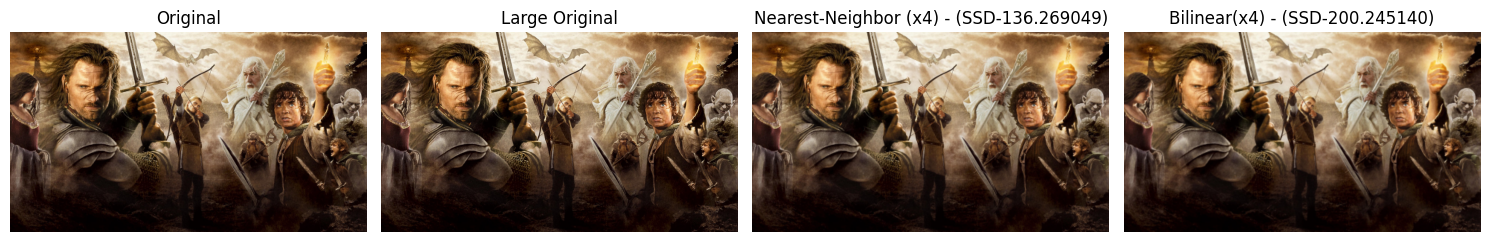

In [111]:
im8_original = cv.imread('a1images/a1q5images/im01small.png', cv.IMREAD_COLOR)
im8_large_original = cv.imread('a1images/a1q5images/im01.png')

zoom_image(im8_original, im8_large_original)

Original image shape: (300, 480, 3)
Original image dtype: uint8
Scale factor: 4
Applying nearest-neighbor interpolation...
Nearest-neighbor result shape: (1200, 1920, 3)
Applying bilinear interpolation...
Bilinear result shape: (1200, 1920, 3)


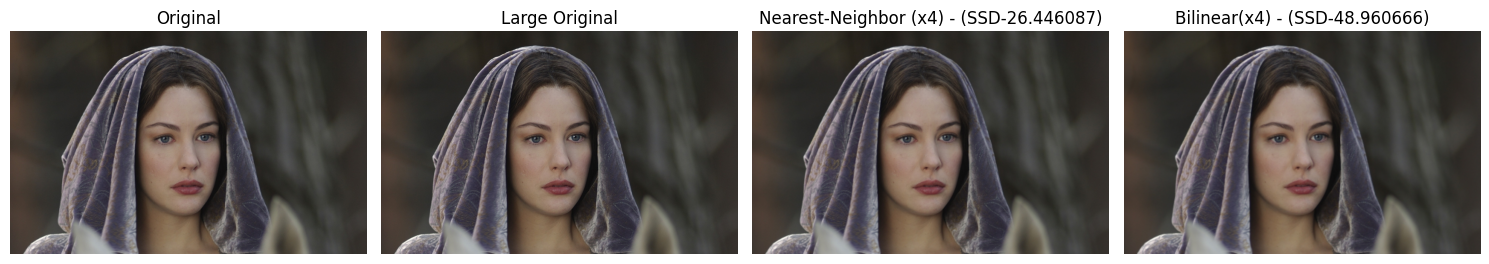

In [112]:
im8_original = cv.imread('a1images/a1q5images/im02small.png', cv.IMREAD_COLOR)
im8_large_original = cv.imread('a1images/a1q5images/im02.png')

zoom_image(im8_original, im8_large_original)